# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 3: Binary Classification and Performance Metrics

## Learning Objectives

At the end of the experiment, you will be able to:

* learn about Classification tasks in Machine learning

* perform Logistic Regression, Softmax Regression

* learn the appropriate performance metrics according to use case

* have an understanding of Decision Boundaries

## Information

### Classification

**Classification** refers to a predictive modeling problem where a class label is predicted for a given example of input data.

**Examples include:**

* Email spam detection (spam or not).
* Churn prediction (churn or not).
* Conversion prediction (buy or not).

**Binary classification** refers to those classification tasks that have two class labels.

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

### Implementing Binary Classification with Logistic Regression

## Dataset

In this example, we will be using "Social_Network_Ads" dataset.

The variable descriptions are as follows:

* Age
* EstimatedSalary

The target feature is:
* Purchased

Problem Statement: To predict if a person will purchase an item based on age and estimated salary.

### Setup Steps:

### Importing required packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Importing the Dataset

In [12]:
df = pd.read_csv('Social_Network_Ads.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
X = df.iloc[:, 1].values # estimated salary
y = df.iloc[:, -1].values
X = X.reshape(-1, 1)
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0
1  15810944       0   35            20000          0
2  15668575       1   26            43000          0
3  15603246       1   27            57000          0
4  15804002       0   19            76000          0


#### Splitting the dataset into the Training set and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
print(X_train)

[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]


In [15]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [16]:
X_test

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [17]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

#### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
print(X_train)

[[ 0.98019606]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [-1.02020406]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [-1.02020406]
 [ 0.98019606]
 [ 0.98019606]
 [-1.02020406]
 [ 0.98019606]
 [-1.02020406]
 [-1.02020

In [21]:
X_test

array([[-1.02020406],
       [ 0.98019606],
       [-1.02020406],
       [ 0.98019606],
       [ 0.98019606],
       [-1.02020406],
       [ 0.98019606],
       [-1.02020406],
       [ 0.98019606],
       [-1.02020406],
       [-1.02020406],
       [ 0.98019606],
       [-1.02020406],
       [-1.02020406],
       [-1.02020406],
       [ 0.98019606],
       [-1.02020406],
       [-1.02020406],
       [ 0.98019606],
       [-1.02020406],
       [ 0.98019606],
       [ 0.98019606],
       [ 0.98019606],
       [-1.02020406],
       [ 0.98019606],
       [ 0.98019606],
       [ 0.98019606],
       [-1.02020406],
       [ 0.98019606],
       [ 0.98019606],
       [-1.02020406],
       [-1.02020406],
       [-1.02020406],
       [-1.02020406],
       [-1.02020406],
       [-1.02020406],
       [-1.02020406],
       [ 0.98019606],
       [ 0.98019606],
       [ 0.98019606],
       [-1.02020406],
       [-1.02020406],
       [ 0.98019606],
       [-1.02020406],
       [ 0.98019606],
       [ 0

#### Training the Logistic Regression model on the Training set




In [22]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Predicting a new test instance

In [23]:
print(classifier.predict(sc.transform([[87000]])))

[1]


#### Predicting the Test set results

In [24]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]]


### Model Evaluation

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score
* ROC curve
* AUROC

#### Confusion Matrix

* **Confusion matrix:**  is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known.

  * **true positive** for correctly predicted event values.
  * **false positive** for incorrectly predicted event values.
  * **true negative** for correctly predicted no-event values.
  * **false negative** for incorrectly predicted no-event values.
* **Accuracy:** it is the ratio of the number of correct predictions to the total number of input samples.


In [25]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This Confusion Matrix tells us that there were 81 correct predictions and 19 incorrect ones.

* True Positive: 15
* True Negative: 66
* False Positive: 2
* False Negative: 17

#### Precision-Recall Metrics

* **Precision:** summarizes the fraction of examples assigned the positive class that belongs to the positive class.

    Precision = $\mathbf{\frac{TruePositive}{TruePositive + FalsePositive}}$

* **Recall:** summarizes how well the positive class was predicted and is the same calculation as sensitivity.

   Recall = $\mathbf{\frac{TruePositive}{TruePositive + FalseNegative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $\mathbf{\frac{2*Precision*Recall}{Precision+Recall}}$

##### Plotting precision-recall curve using sklearn

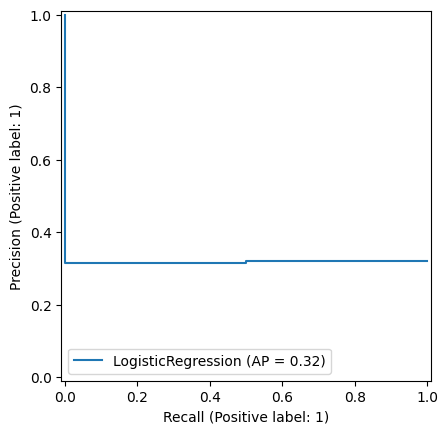

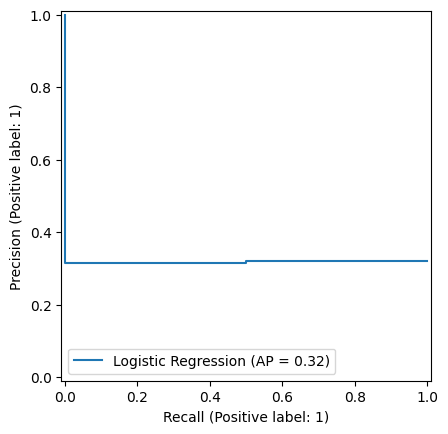

In [37]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(
   y_test, y_pred)

plt.show()

The above diagram shows the blue line as precision-recall curve.

### ROC-AUC curve

A ROC curve is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.

Area Under Curve (AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problems.

AUC has a range of [0, 1]. The greater the value, the better is the performance of our model.

#### Plotting the ROC-AUC curve for Logistic Regression algorithm using matplotlib

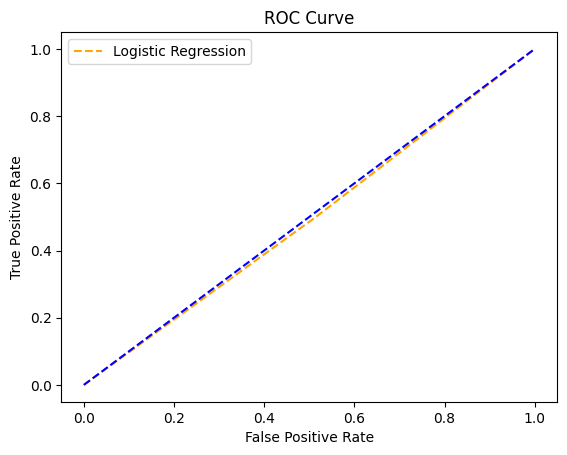

In [39]:
from sklearn.metrics import roc_curve
pred_prob1 = classifier.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:, 1], pos_label=1)

# ROC curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# Title and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

The above diagram shows:

ROC curve: is the orange dotted line

AUROC: is the area under the orange dotted line

The blue dotted line is the reference line.

Please refer to the given [link](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) for further information on Performance metrics and [ROC-AUC curve](https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152)

### Example: Predicting Diabetes with Logistic Regression

Let us now apply the above learnings to perform a logistic regression using a 'UCI PIMA Indian Diabetes' dataset.

 * Fit the model
 * Do the prediction
 * Plot the ROC-AUC curve for the Logistic Regression algorithm



#### Dataset

In this example, we will be using the "UCI PIMA Indian Diabetes" dataset.

The datasets consist of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

The variable descriptions are as follows:

* Pregnancies: Number of Pregnancies
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* Blood pressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

Problem statement:

We will be using this dataset to predict if a person has diabetes or not using the medical attributes provided.

#### Importing the dataset

In [40]:
DF = pd.read_csv('diabetes.csv')
print(DF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### Finding if there are any null values

In [41]:
print(DF.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Training our model

In [42]:
X_diabetes = DF.iloc[:, :-1].values  # All features except Outcome
y_diabetes = DF.iloc[:, -1].values  # Outcome (target variable)

#### Splitting the data into training and testing data

In [43]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.25, random_state=0)

#### Training the Logistic Regression model on the Training set

In [44]:
classifier_diabetes = LogisticRegression(random_state=0)
classifier_diabetes.fit(X_train_diabetes, y_train_diabetes)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

#### Training/Fitting the Model

In [45]:
y_pred_diabetes = classifier_diabetes.predict(X_test_diabetes)
print(np.concatenate((y_pred_diabetes.reshape(len(y_pred_diabetes), 1), y_test_diabetes.reshape(len(y_test_diabetes), 1)), 1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

#### Confusion Matrix

In [46]:
cm_diabetes = confusion_matrix(y_test_diabetes, y_pred_diabetes)
print(cm_diabetes)

[[115  15]
 [ 25  37]]


#### Plotting the ROC curve for Logistic Regression algorithm using matplotlib

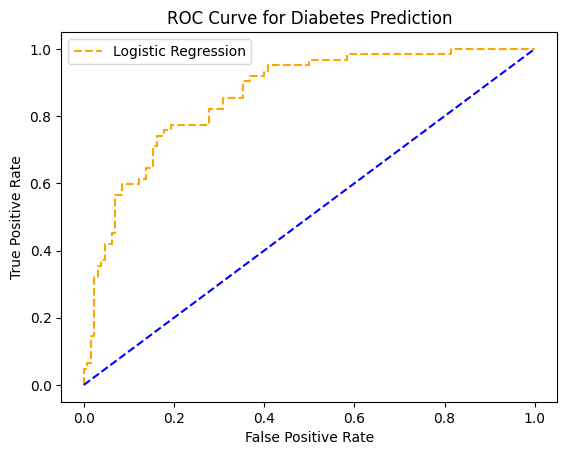

In [48]:
pred_prob_diabetes = classifier_diabetes.predict_proba(X_test_diabetes)
fpr_diabetes, tpr_diabetes, thresh_diabetes = roc_curve(y_test_diabetes, pred_prob_diabetes[:, 1], pos_label=1)

random_probs_diabetes = [0 for i in range(len(y_test_diabetes))]
p_fpr_diabetes, p_tpr_diabetes, _ = roc_curve(y_test_diabetes, random_probs_diabetes, pos_label=1)

plt.plot(fpr_diabetes, tpr_diabetes, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr_diabetes, p_tpr_diabetes, linestyle='--', color='blue')

plt.title('ROC Curve for Diabetes Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC_diabetes', dpi=300)
plt.show()

###  Softmax Regression

The **Softmax regression** is a form of logistic regression that normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1.

It is also called **multinomial logistic regression.**

Performing Softmax Regression on the above dataset "Social_Network_Ads"

In [58]:
X = df[['EstimatedSalary', 'Age']]
y = df.iloc[:, -1].values  # Target variable (Purchased)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

#### Splitting the dataset into the Training set and Test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)        # Only transform on the test data (to prevent data leakage)

#### Training the Softmax Regression model on the Training set

In [61]:
softmax_reg = LogisticRegression(multi_class='multinomial', # switch to Softmax Regression
                                     solver='lbfgs', # handle multinomial loss, L2 penalty
                                     C=10)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

#### Predicting a new result

In [62]:
softmax_reg.predict(sc.transform([[30,87000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [63]:
softmax_reg.predict_proba(sc.transform([[30,87000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [67]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.89

### Decision Boundary

In classification problems with two or more classes, a decision boundary is a hypersurface that separates the underlying vector space into sets, one for each class.

#### Creating Dummy Dataset

In [64]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

#### Creating Decision Boundary

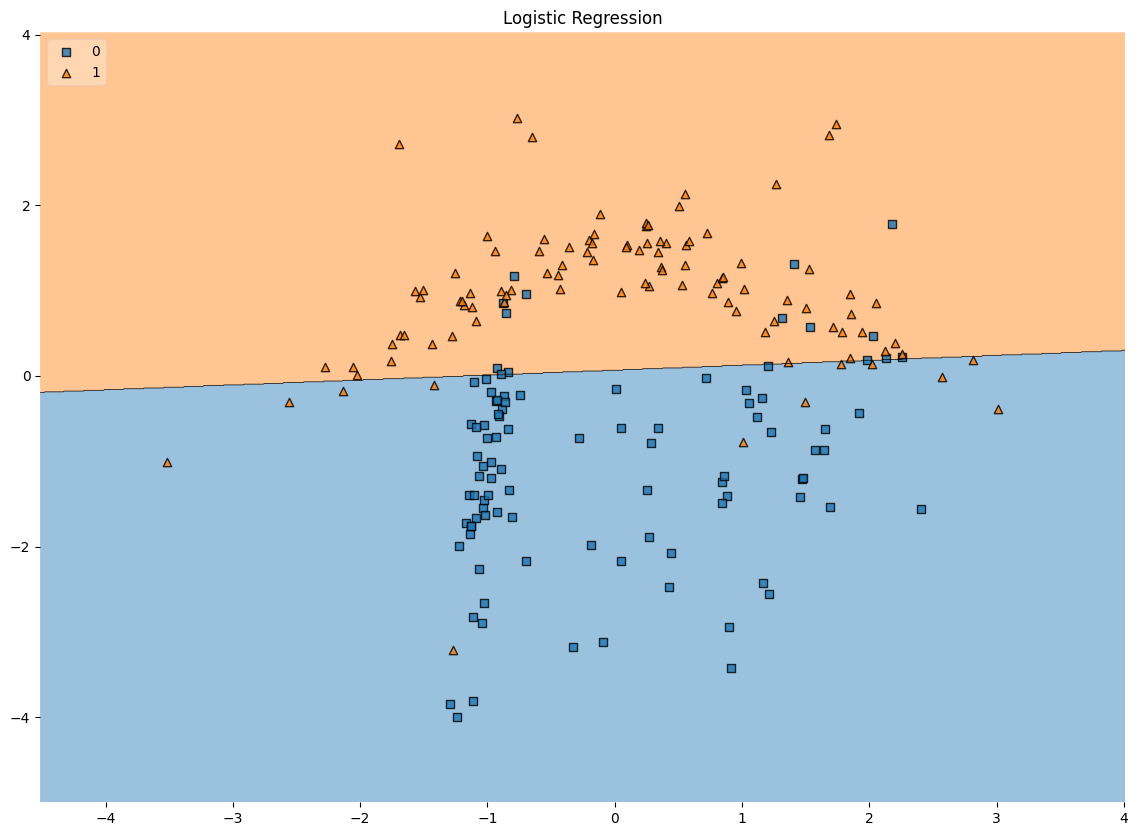

In [68]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(14, 10))

label = 'Logistic Regression'
clf = LogisticRegression(random_state=0)
clf.fit(X, y)

fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.title(label)
plt.show()


### Reference

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

### Theory Questions

1. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

  Both Mini-batch and Stochastic gradient descent are not guaranteed to minimize the cost function after each step because they both have a degree of randomness built into them. Mini-bath randomly chooses which training examples to perform gradient descent on while Stochastic randomly chooses a single example. A better option is to save the model at regular intervals. When the model has not improved for a long time you can revert to the saved models.

2. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

  Gradient descent produces a convex-shaped graph that only has one global optimum. Therefore, it cannot get stuck in a local minimum.

3. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

  No. The issue is that stochastic gradient descent and mini-batch gradient descent have randomness built into them. This means that they can find their way to nearby the global optimum, but they generally don't converge. One way to help them converge is to gradually reduce the learning rate hyperparameter.

4. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime, should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

  Softmax regression does not handle multiple output classes (i.e. [indoor, daytime]). So you'll need to use two logistic regression classifiers.


### Please answer the questions below to complete the experiment:




In [ ]:
#@title We are interested in reducing the number of false negatives. Which of the following metrics should we primarily look for? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "High Accuracy", "High Precision", "High Recall"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")